In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
from matplotlib import cm
from math import ceil

# Louisville Metro Police Department Bias Study 

| item | Meaning |
| -- | -- |
| stops | Cleaned dataframe of police citations |
| LMPD | Cleaned dataframe of police Department |
| Louisville_stats| Cleaned dataframe of cencus data |

In [4]:
officers = pd.read_csv('data/sworn_officers.csv')
officers.head()

,badge fname lname
0,2000 DON HARGADON
1,2001 BILLY SHAW
2,2004 BRIAN LUCKETT
3,2005 KIMBERLY FARMER
4,2006 JASON LAINHART


In [5]:
officers[['badge', 'fname', 'lname']] = officers['badge fname lname'].str.split(' ', n=2, expand=True)
officers['full_name'] = officers['fname'] + ' ' + officers['lname']
officers = officers.drop(columns=['badge fname lname'])
officers.head()

,badge,fname,lname,full_name
0,2000,DON,HARGADON,DON HARGADON
1,2001,BILLY,SHAW,BILLY SHAW
2,2004,BRIAN,LUCKETT,BRIAN LUCKETT
3,2005,KIMBERLY,FARMER,KIMBERLY FARMER
4,2006,JASON,LAINHART,JASON LAINHART


In [6]:
stops = pd.read_csv('data/citation_2019.csv')
LMPD = pd.read_csv('data/employee.csv')
Louisville_stats = pd.read_csv('data/census.csv')

In [7]:
stops.drop(columns=['CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId'], inplace=True)
stops['OFFICER_RACE'] = stops['OFFICER_RACE'].replace(['UNKNOWN'], ' ')
stops.drop(stops.loc[stops['OFFICER_RACE']==' '].index, inplace=True)
stops.sort_values(by=['OFFICER_RACE'], inplace=True)


In [8]:
race = {
    'A': 'ASIAN',
    'B': 'BLACK',
    'H': 'HISPANIC',
    'W': 'WHITE',
    'U': 'unknown'
}

LMPD['OFFICER_RACE'] = LMPD['OFFICER_RACE'].str.strip()
LMPD['OFFICER_RACE'] = LMPD['OFFICER_RACE'].replace(race)

In [9]:
race_percentage_cols = [
    'Total_population', 'Total_male_population', 'Total_female_population',
    'Total_population_for_race', 'White_alone', 'Black', 'Native_American',
    'Asian', 'Hawaiian_Pacific_Islander', 'Other_race_alone', 'Two_or_more'
]

percent_df = pd.DataFrame()


for col in race_percentage_cols:
    percent_df[col + " (%)"] = Louisville_stats[col].apply(lambda x: (x / Louisville_stats["Total_population"]) * 100)

percent_df

,Total_population (%),Total_male_population (%),Total_female_population (%),Total_population_for_race (%),White_alone (%),Black (%),Native_American (%),Asian (%),Hawaiian_Pacific_Islander (%),Other_race_alone (%),Two_or_more (%)
0,100.0,48.320773,51.679227,100.0,70.237852,21.931524,0.139247,2.977542,0.064939,1.182298,3.466598


# Plots 

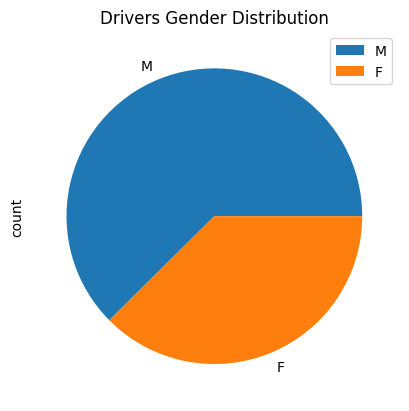

In [10]:
stops['DRIVER_GENDER'].value_counts().plot.pie(title='Drivers Gender Distribution', legend=True);

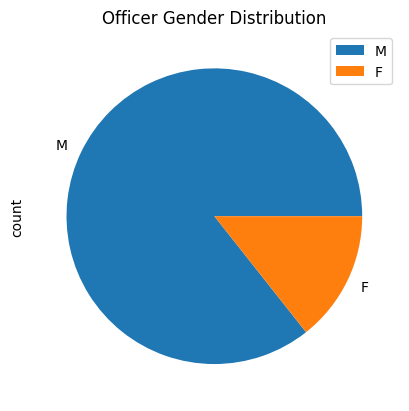

In [11]:
LMPD['OFFICER_SEX'].value_counts().plot.pie(title='Officer Gender Distribution', legend=True);

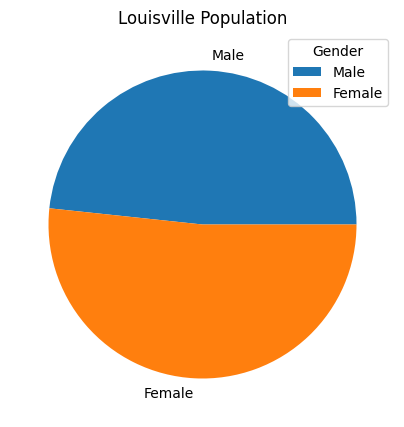

In [12]:
total_male_population = percent_df['Total_male_population (%)'].iloc[0]
total_female_population = percent_df['Total_female_population (%)'].iloc[0]

# Labels for the pie chart
labels = ['Male', 'Female']

# Values for each section of the pie chart
sizes = [total_male_population, total_female_population]


# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels)
plt.title('Louisville Population')  
plt.legend(labels, loc="best", title="Gender", fancybox=True)
plt.show()

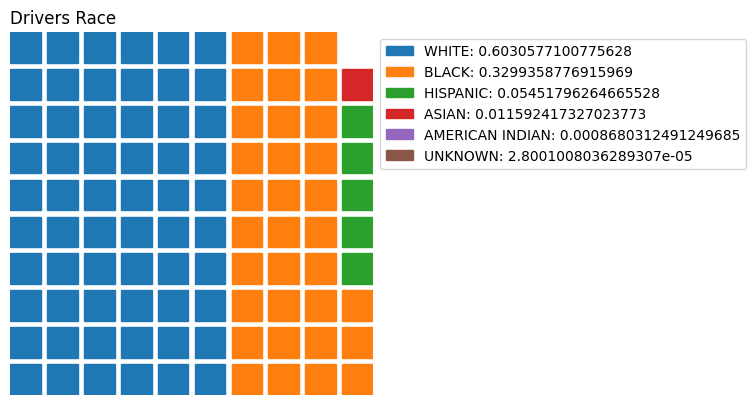

In [13]:
driver_race = stops['DRIVER_RACE'].value_counts()

# Determine total count and proportions
total = driver_race .sum()
proportions = driver_race  / total

# Set up the waffle plot
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  
    columns=10,
    values=proportions * 100,  
    colors=[cm.tab10(i) for i in range(len(driver_race ))],  
    title={'label': 'Drivers Race', 'loc': 'left'},
    labels=[f"{index}: {value}" for index, value in proportions.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Show plot
plt.show()

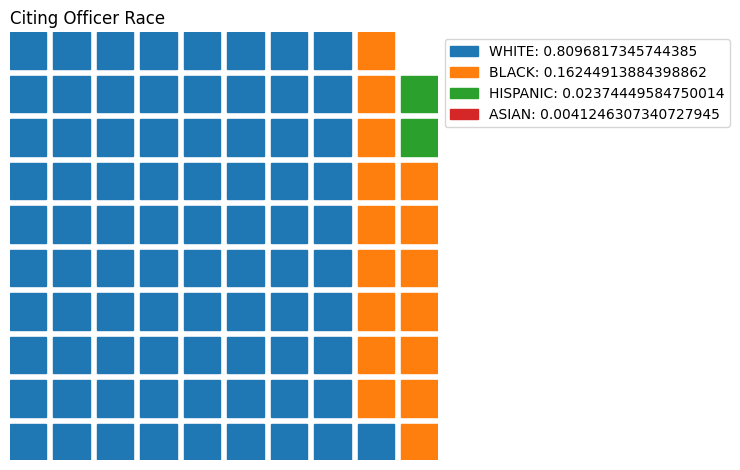

In [14]:
officer_race = stops['OFFICER_RACE'].value_counts()

# Determine total count and proportions
total = officer_race .sum()
proportions = officer_race  / total

# Set up the waffle plot
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  
    columns=10,
    values=proportions * 100,  
    colors=[cm.tab10(i) for i in range(len(officer_race ))],  
    title={'label': 'Citing Officer Race', 'loc': 'left'},
    labels=[f"{index}: {value}" for index, value in proportions.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Show plot
plt.show()

In [15]:
stops.head()

,TYPE_OF_STOP,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE
17273,TRAFFIC VIOLATION,M,ASIAN,21 - 30,M,WHITE,31 - 40
16838,TRAFFIC VIOLATION,M,ASIAN,31 - 40,M,HISPANIC,26 - 30
158,TRAFFIC VIOLATION,M,ASIAN,41 - 50,M,BLACK,20 - 25
21011,TRAFFIC VIOLATION,M,ASIAN,31 - 40,M,WHITE,31 - 40
687,TRAFFIC VIOLATION,M,ASIAN,31 - 40,M,WHITE,20 - 25


In [16]:
stops['OFFICER_GENDER'].value_counts()

OFFICER_GENDER
M    34715
F     1167
Name: count, dtype: int64

In [17]:
stops.shape

(35882, 7)

In [18]:
stops.query('OFFICER_GENDER == "F" and DRIVER_GENDER == "F"')

,TYPE_OF_STOP,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE
30318,TRAFFIC VIOLATION,F,BLACK,31 - 40,F,WHITE,26 - 30
30798,TRAFFIC VIOLATION,F,BLACK,21 - 30,F,BLACK,41 - 50
6211,TRAFFIC VIOLATION,F,BLACK,21 - 30,F,BLACK,31 - 40
7871,TRAFFIC VIOLATION,F,BLACK,21 - 30,F,BLACK,41 - 50
23993,TRAFFIC VIOLATION,F,BLACK,21 - 30,F,BLACK,51 - 60
...,...,...,...,...,...,...,...
13254,TRAFFIC VIOLATION,F,WHITE,41 - 50,F,WHITE,OVER 60
13248,TRAFFIC VIOLATION,F,WHITE,41 - 50,F,BLACK,26 - 30
13183,TRAFFIC VIOLATION,F,WHITE,21 - 30,F,BLACK,41 - 50
13177,TRAFFIC VIOLATION,F,WHITE,21 - 30,F,BLACK,31 - 40


In [19]:
male_officer_male_driver_citations = len(stops.query('OFFICER_GENDER == "M" and DRIVER_GENDER == "M"'))
male_officer_female_driver_citations = len(stops.query('OFFICER_GENDER == "M" and DRIVER_GENDER == "F"'))
female_officer_male_driver_citations = len(stops.query('OFFICER_GENDER == "F" and DRIVER_GENDER == "M"'))
female_officer_female_driver_citations = len(stops.query('OFFICER_GENDER == "F" and DRIVER_GENDER == "F"'))

total_stops = len(stops)

male_officer_male_driver = (male_officer_male_driver_citations / total_stops) * 100
male_officer_female_driver = (male_officer_female_driver_citations / total_stops) * 100
female_officer_male_driver = (female_officer_male_driver_citations / total_stops) * 100
female_officer_female_driver = (female_officer_female_driver_citations / total_stops) * 100
female_officer_female_driver


1.2596845214870966

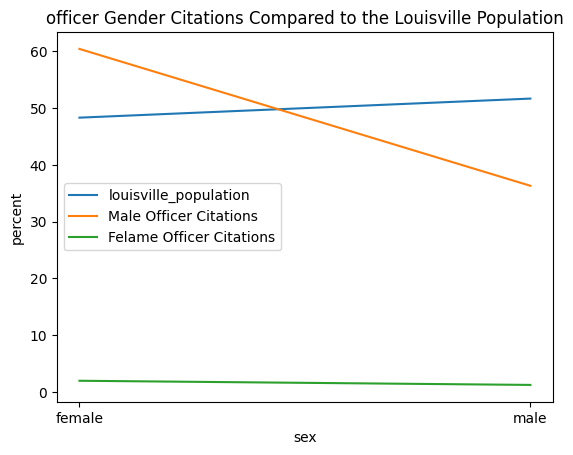

In [20]:
# graph of above data to show males have a higher citation rate while population is almost equal   
# x axis values 
x = ['female', 'male'] 

# corresponding y axis values 
ys = {
    'louisville_population' : [percent_df['Total_male_population (%)'], percent_df['Total_female_population (%)']],
    'Male Officer Citations' : [male_officer_male_driver, male_officer_female_driver],
    'Felame Officer Citations' : [female_officer_male_driver, female_officer_female_driver]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('sex')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer Gender Citations Compared to the Louisville Population') 
    
# function to show the plot 
plt.show() 

In [21]:
stops.head()

,TYPE_OF_STOP,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE
17273,TRAFFIC VIOLATION,M,ASIAN,21 - 30,M,WHITE,31 - 40
16838,TRAFFIC VIOLATION,M,ASIAN,31 - 40,M,HISPANIC,26 - 30
158,TRAFFIC VIOLATION,M,ASIAN,41 - 50,M,BLACK,20 - 25
21011,TRAFFIC VIOLATION,M,ASIAN,31 - 40,M,WHITE,31 - 40
687,TRAFFIC VIOLATION,M,ASIAN,31 - 40,M,WHITE,20 - 25


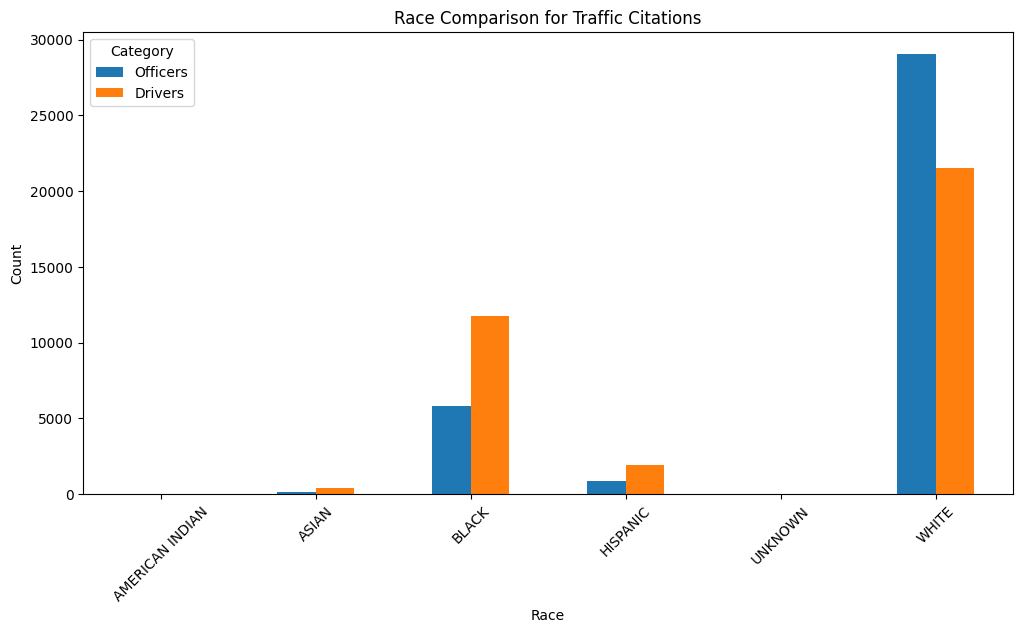

In [22]:
officer_race_counts = stops['OFFICER_RACE'].value_counts().sort_index()
driver_race_counts = stops['DRIVER_RACE'].value_counts().sort_index()

# Create a combined DataFrame
race_counts = pd.DataFrame({
    'Officers': officer_race_counts,
    'Drivers': driver_race_counts
}).fillna(0)

# Plot the data using grouped bar charts
race_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Comparison for Traffic Citations')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

In [23]:
import requests 

expected_cols_employee = ['AOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE',
       'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION',
       'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId']

url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_Demographics/FeatureServer/0'
params = {
    'where': '1=1',
    'outFields': '*',
    'returnGeometry': 'false',
    'resultOffset': 0,
    'resultRecordCount': 10,
    'f': 'json'
}

response = requests.get(f"{url}/query", params=params)
data_list = [feature['attributes'] for feature in response.json().get('features', [])]

df = pd.DataFrame(data_list)

In [33]:
expected_cols_citation = [
'TYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS',
'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE',
'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION',
'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH',
'ObjectId'
]

expected_cols_employee = [
'AOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE',
'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION',
'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'
]


citation_url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_STOP_DATA_2019_(2)/FeatureServer/0'
employee_url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_Demographics/FeatureServer/0'

def api_test_call(url):
    params = {
        'where': '1=1',
        'outFields': '*',
        'returnGeometry': 'false',
        'resultOffset': 0,
        'resultRecordCount': 10,
        'f': 'json'
    }

    response = requests.get(f"{url}/query", params=params)
    data_list = [feature['attributes'] for feature in response.json().get('features', [])]

    df = pd.DataFrame(data_list)
    return df

In [34]:
api_test_call(employee_url)

,AOC_CODE,RANK_TITLE,OFFICER_SEX,OFFICER_RACE,OFFICER_AGE_RANGE,OFFICER_AGE,OFFICER_DIVISION,OFFICER_ASSIGNMENT,OFFICER_YEARS_SWORN,ObjectId
0,2510,ASST POLICE CHIEF-LT COLONEL,F,W,40 - 49,48,ADMINISTRATIVE BUREAU ...,STAFF ...,22,1
1,2512,POLICE LIEUTENANT,M,W,40 - 49,46,3RD DIVISION ...,STAFF ...,22,2
2,2518,POLICE OFFICER,F,W,40 - 49,45,PUBLIC INFORMATION OFFICE ...,COMMUNITY ENGAGEMENT UNIT ...,21,3
3,2519,POLICE OFFICER,F,W,40 - 49,47,CIS ROBBERY ...,FINANCIAL CRIMES ...,22,4
4,2521,POLICE MAJOR,M,W,50 - 59,52,MAJOR CRIME DIVISION ...,STAFF ...,23,5
5,2522,POLICE OFFICER,M,W,50 - 59,55,MAJOR CASE UNIT ...,INTERDICTION SQUAD ...,22,6
6,2524,POLICE SERGEANT,M,W,50 - 59,55,PROFESSIONAL STANDARDS UNIT ...,STAFF ...,23,7
7,2528,POLICE OFFICER,M,W,50 - 59,51,8TH DIVISION ...,1ST PLATOON ...,25,8
8,2530,POLICE OFFICER,M,W,40 - 49,49,2ND DIVISION ...,1ST PLATOON ...,19,9
9,2531,POLICE MAJOR,M,W,50 - 59,50,2ND DIVISION ...,STAFF ...,21,10


In [35]:
import requests
import pandas as pd

expected_cols_citation = [
    'TYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS',
    'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE',
    'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION',
    'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
    'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH',
    'ObjectId'
]

expected_cols_employee = [
    'AOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE',
    'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION',
    'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'
]

citation_url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_STOP_DATA_2019_(2)/FeatureServer/0'
employee_url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_Demographics/FeatureServer/0'


def api_test_call(url):
    params = {
        'where': '1=1',
        'outFields': '*',
        'returnGeometry': 'false',
        'resultOffset': 0,
        'resultRecordCount': 10,
        'f': 'json'
    }

    try:
        response = requests.get(f"{url}/query", params=params)
        response.raise_for_status()
        data_list = [feature['attributes'] for feature in response.json().get('features', [])]
        df = pd.DataFrame(data_list)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error connecting to the API: {e}")
        return None


def api_test(test_api_call, api_url, col_list):
    df = test_api_call(api_url)
    
    if df is None:
        print("Returned blank data. Check if the API URL is still maintained.")
        return
    
    print("API still connects, no errors.")
    
    if set(col_list).issubset(df.columns):
        print("Data structure matches expected columns.")
    else:
        print("Data structure has changed.")
    return df


# Example usage for citation API
df_citation = api_test(api_test_call, citation_url, expected_cols_citation)

# Example usage for employee API
df_employee = api_test(api_test_call, employee_url, expected_cols_employee)


API still connects, no errors.
Data structure matches expected columns.
API still connects, no errors.
Data structure matches expected columns.


In [36]:
import requests
import pandas as pd
import os

# URLs and expected columns
expected_cols_citation = [
    'TYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS',
    'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE',
    'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION',
    'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
    'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH',
    'ObjectId'
]

expected_cols_employee = [
    'AOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE',
    'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION',
    'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'
]

citation_url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_STOP_DATA_2019_(2)/FeatureServer/0'
employee_url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/LMPD_Demographics/FeatureServer/0'


# API call for 10 rows
def api_test_call(url):
    params = {
        'where': '1=1',
        'outFields': '*',
        'returnGeometry': 'false',
        'resultOffset': 0,
        'resultRecordCount': 10,
        'f': 'json'
    }

    try:
        response = requests.get(f"{url}/query", params=params)
        response.raise_for_status()  # Raises HTTPError if status code is not 200
        data_list = [feature['attributes'] for feature in response.json().get('features', [])]
        df = pd.DataFrame(data_list)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error connecting to the API: {e}")
        return None


# Full API call to retrieve all data
def fetch_all_data(url, batch_size=1000):
    data_list = []
    offset = 0

    while True:
        params = {
            'where': '1=1',
            'outFields': '*',
            'returnGeometry': 'false',
            'resultOffset': offset,
            'resultRecordCount': batch_size,
            'f': 'json'
        }

        response = requests.get(f"{url}/query", params=params)
        response.raise_for_status()

        query_result = response.json()
        features = query_result.get('features', [])

        for feature in features:
            data_list.append(feature['attributes'])

        if len(features) < batch_size:
            break

        offset += batch_size

    df = pd.DataFrame(data_list)
    return df


# Test flow and fetch full data if test passes
def api_test(test_api_call, api_url, col_list):
    # Run the test API call to get 10 rows
    df = test_api_call(api_url)

    if df is None:
        print("Returned blank data. Check if the API URL is still maintained.")
        return

    print("API still connects, no errors.")

    # Check column structure
    if set(col_list).issubset(df.columns):
        print("Data structure matches expected columns.")
        
        # Fetch all data if structure is correct
        df_full = fetch_all_data(api_url)
        
        # Save the data
        output_directory = 'data'
        os.makedirs(output_directory, exist_ok=True)

        output_file = os.path.join(output_directory, 'employee.csv' if api_url == employee_url else 'citation.csv')
        df_full.to_csv(output_file, index=False)

        print(f"Data saved to {output_file}")
        
    else:
        print("Data structure has changed.")


# Example usage for citation API
api_test(api_test_call, citation_url, expected_cols_citation)

# Example usage for employee API
api_test(api_test_call, employee_url, expected_cols_employee)


API still connects, no errors.
Data structure matches expected columns.
Data saved to data/citation.csv
API still connects, no errors.
Data structure matches expected columns.
Data saved to data/employee.csv
